In [2]:
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable


In [6]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [7]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [8]:
!pip install scipy

Defaulting to user installation because normal site-packages is not writeable


In [9]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [13]:
!pip install Flask

Defaulting to user installation because normal site-packages is not writeable


In [27]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.19.0-cp312-cp312-win_amd64.whl.metadata (4.1 kB)
  Using cached absl_py-2.3.0-py3-none-any.whl.metadata (2.4 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached grpcio-1.73.0-cp312-cp312-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.10.0-py3-none-any.whl.metadata (6.0 kB)
  Using cached ml_dtypes-0.5.1-cp312-cp312-win_amd64.whl.metadata (22 kB)
  Using cach

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
import tensorflow as tf
print(tf.__version__)


2.19.0


In [4]:
import tensorflow as tf

# Create a constant tensor
hello = tf.constant("Hello, TensorFlow!")

# Print the tensor
print(hello)
print(hello.numpy().decode())



tf.Tensor(b'Hello, TensorFlow!', shape=(), dtype=string)
Hello, TensorFlow!


In [5]:
pip install opencv-python


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
    --------------------------------------- 0.5/39.5 MB 1.7 MB/s eta 0:00:24
    --------------------------------------- 0.8/39.5 MB 1.8 MB/s eta 0:00:22
   - -------------------------------------- 1.3/39.5 MB 1.9 MB/s eta 0:00:20
   - -------------------------------------- 1.8/39.5 MB 2.0 MB/s eta 0:00:20
   -- ------------------------------------- 2.1/39.5 MB 2.0 MB/s eta 0:00:19
   -- ------------------------------------- 2.6/39.5 MB 2.0 MB/s eta 0:00:19
   --- ------------------------------------ 3.1/39.5 MB 2.0 MB/s eta 0:00:18
   --- ------------------------------------ 3.7/39.5 MB 2.1 MB/s eta 0:00:18
   --- ------------------------------------ 3.9/39.5 MB 2.1 MB/s eta 0:00:17
   ---- ----------------------------------- 4.5/39.5 MB 2.1 MB/s eta 0:00:17
   ----- ---

In [3]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
# Define the directory path
data_dir =r'C:\Users\VYSHU\Downloads\dataset2-master\dataset2-master\images\TRAIN'
# Define the class labels
class_labels = ['eosinophil', 'lymphocyte', 'monocyte', 'neutrophil']
# Initialize lists to hold file paths and Labels
filepaths = []
labels = []
# Loop through each class directory and gather file paths and Labels
for label in class_labels:
    class_dir = os.path.join(data_dir, label)
    for file in os.listdir (class_dir):
        if file.endswith('.jpeg') or file.endswith('.png'): # Ensure file is an image
            filepaths.append(os.path.join(class_dir, file))
            labels.append(label)
# Create a DataFrame from the file paths and Labels
bloodCell_df = pd.DataFrame({
'filepaths': filepaths,
'labels': labels
})
# Shuffle the DataFrame
bloodCell_df = bloodCell_df.sample(frac=1).reset_index(drop=True)
bloodCell_df.head()

,filepaths,labels
0,C:\Users\VYSHU\Downloads\dataset2-master\datas...,eosinophil
1,C:\Users\VYSHU\Downloads\dataset2-master\datas...,eosinophil
2,C:\Users\VYSHU\Downloads\dataset2-master\datas...,neutrophil
3,C:\Users\VYSHU\Downloads\dataset2-master\datas...,eosinophil
4,C:\Users\VYSHU\Downloads\dataset2-master\datas...,eosinophil


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator with normalization
datagen = ImageDataGenerator(rescale=1./255)  # scale pixel values to [0,1]

# Create the training generator
train = datagen.flow_from_directory(
    r'C:\Users\VYSHU\Downloads\dataset2-master\dataset2-master\images\TRAIN',
    target_size=(150, 150),  # resize images to 150x150
    batch_size=32,
    class_mode='categorical'  # multi-class classification
)


Found 9957 images belonging to 4 classes.


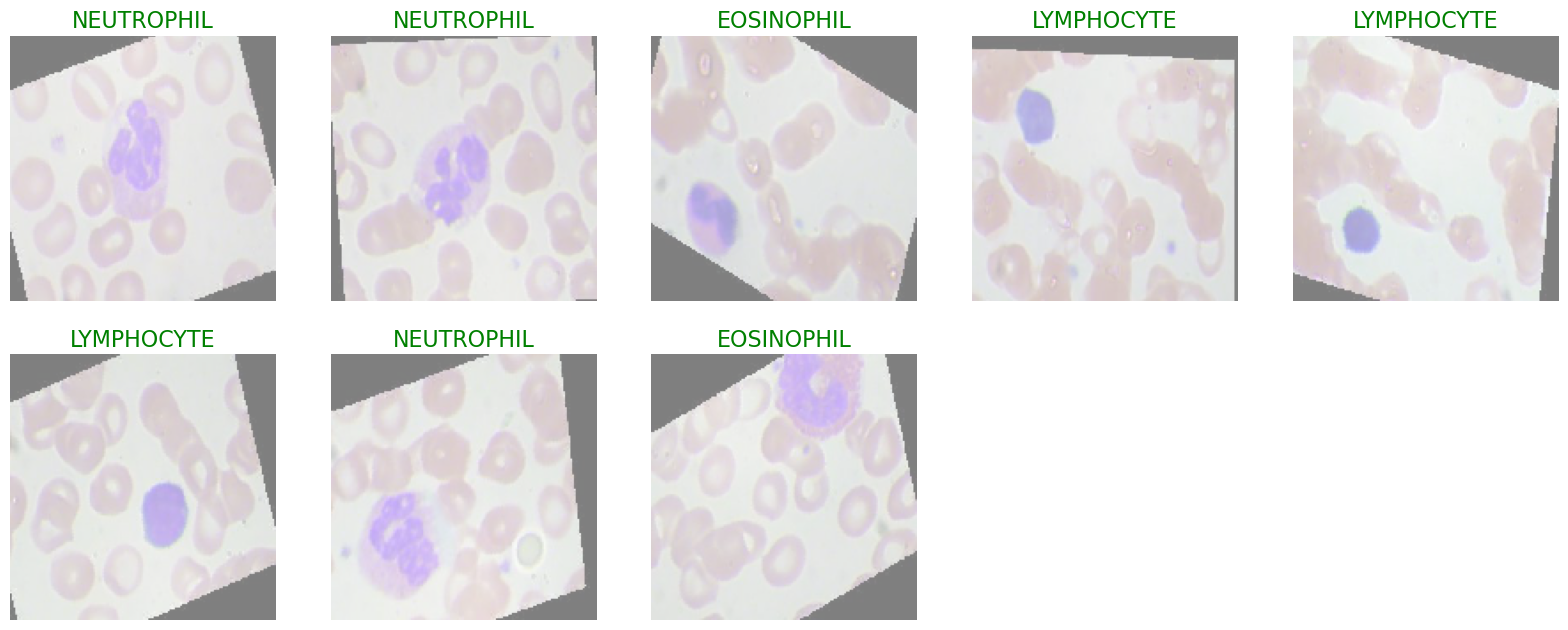

In [6]:
import matplotlib.pyplot as plt
import numpy as np
def show_knee_images (image_gen):
    test_dict = image_gen.class_indices
    classes = list(test_dict.keys())
    images, labels=next(image_gen)
    plt.figure(figsize=(20,20))
    length = len(labels)
    if length<25:
        r=length
    else:
        r = 8
    for i in range(r):
        plt.subplot(5,5,i+1)
        image=(images[i]+1)/2
        plt.imshow(image)
        index=np.argmax(labels[i])
        class_name=classes [index]
        plt.title(class_name, color="green", fontsize=16)
        plt.axis('off')
    plt.show()
show_knee_images(train)

In [7]:
train_images, test_images = train_test_split(bloodCell_df, test_size=0.3, random_state=42)
train_set, val_set = train_test_split(bloodCell_df, test_size=0.2, random_state=42)
print(train_set.shape)
print(test_images.shape)
print(val_set.shape)
print(train_images.shape)

(7965, 2)
(2988, 2)
(1992, 2)
(6969, 2)


In [8]:
image_gen =ImageDataGenerator (preprocessing_function =tf.keras.applications.mobilenet_v2.preprocess_input)
train= image_gen.flow_from_dataframe(dataframe =train_set, x_col="filepaths",y_col="labels",
                                     target_size=(244,244), 
                                     color_mode="rgb",
                                     class_mode="categorical",
                                     batch_size=8, 
                                     shuffle=False 
                                    )
test= image_gen.flow_from_dataframe(dataframe =test_images,x_col="filepaths", y_col="labels",
                                   target_size=(244,244), 
                                    color_mode= 'rgb',
                                    class_mode= "categorical", batch_size= 8,
                                    shuffle=False)
val=image_gen.flow_from_dataframe(dataframe=val_set,x_col="filepaths", y_col="labels", target_size= (244,244),
color_mode= "rgb", class_mode= "categorical",
batch_size =8, shuffle=False)


Found 7965 validated image filenames belonging to 4 classes.
Found 2988 validated image filenames belonging to 4 classes.
Found 1992 validated image filenames belonging to 4 classes.


In [9]:
model=keras.models.Sequential ([
keras.layers.Conv2D(filters=128, kernel_size=(8, 8), strides=(3, 3), activation='relu', input_shape=(224, 224, 3)),
keras.layers.BatchNormalization(),
keras.layers.Conv2D(filters=256, kernel_size=(5, 5), strides =(1, 1), activation='relu', padding="same"),
keras.layers.BatchNormalization(),
keras.layers.MaxPool2D(pool_size=(3, 3)),
keras.layers.Conv2D(filters=256, kernel_size=(3, 3), strides =(1, 1), activation='relu', padding="same"),
keras.layers.BatchNormalization(),
keras.layers.Conv2D(filters=256, kernel_size=(1, 1), strides= (1, 1), activation='relu', padding="same"),
keras.layers.BatchNormalization(),
keras.layers.Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1), activation='relu', padding="same"),
keras.layers.BatchNormalization(),
keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
keras.layers.BatchNormalization(),
keras.layers.MaxPool2D(pool_size=(2, 2)),
keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
keras.layers.BatchNormalization(),
keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
keras.layers.BatchNormalization(),
keras.layers.MaxPool2D(pool_size=(2, 2)),
keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
keras.layers.BatchNormalization(),
keras.layers.MaxPool2D(pool_size=(2, 2)),
keras.layers.Flatten(),
keras.layers.Dense (1024, activation='relu'),
keras.layers.Dropout(0.5),
keras.layers.Dense (1024, activation='relu'),
keras.layers. Dropout(0.5),
keras.layers.Dense(4, activation='softmax')
])
model.compile(
loss='categorical_crossentropy',
optimizer=tf.optimizers.SGD(learning_rate=0.001),
metrics=['accuracy']
)
model.summary()

C:\Users\VYSHU\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 73, 73, 128)         │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 73, 73, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 73, 73, 256)         │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 73, 73, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 24, 24, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 256)         │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 24, 24, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 24, 24, 256)         │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 24, 24, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 24, 24, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 24, 24, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 12, 12, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 12, 12, 512)         │           2,0

 Total params: 15,611,524 (59.55 MB)

 Trainable params: 15,605,124 (59.53 MB)

 Non-trainable params: 6,400 (25.00 KB)

In [10]:
history=model.fit(train,epochs=5,validation_data=val,verbose=1)

C:\Users\VYSHU\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
996/996 ━━━━━━━━━━━━━━━━━━━━ 2199s 2s/step - accuracy: 0.3159 - loss: 1.9995 - val_accuracy: 0.5346 - val_loss: 1.0389
Epoch 2/5
996/996 ━━━━━━━━━━━━━━━━━━━━ 2893s 3s/step - accuracy: 0.5069 - loss: 1.1170 - val_accuracy: 0.6531 - val_loss: 0.8401
Epoch 3/5
996/996 ━━━━━━━━━━━━━━━━━━━━ 2303s 2s/step - accuracy: 0.6333 - loss: 0.8655 - val_accuracy: 0.8128 - val_loss: 0.5221
Epoch 4/5
996/996 ━━━━━━━━━━━━━━━━━━━━ 2303s 2s/step - accuracy: 0.7665 - loss: 0.5670 - val_accuracy: 0.8584 - val_loss: 0.3432
Epoch 5/5
996/996 ━━━━━━━━━━━━━━━━━━━━ 2389s 2s/step - accuracy: 0.8464 - loss: 0.3865 - val_accuracy: 0.9127 - val_loss: 0.2443


In [11]:
history1=model.fit(train,epochs=1,validation_data=val,verbose=1)

996/996 ━━━━━━━━━━━━━━━━━━━━ 2043s 2s/step - accuracy: 0.8926 - loss: 0.2732 - val_accuracy: 0.9182 - val_loss: 0.2189


In [14]:
pred = model.predict(test)
pred = np. argmax(pred, axis=1) #pick class with highest probability
labels = (train.class_indices)
labels = dict((v,k) for k, v in labels.items())
pred2 = [labels[k] for k in pred]


374/374 ━━━━━━━━━━━━━━━━━━━━ 822s 2s/step


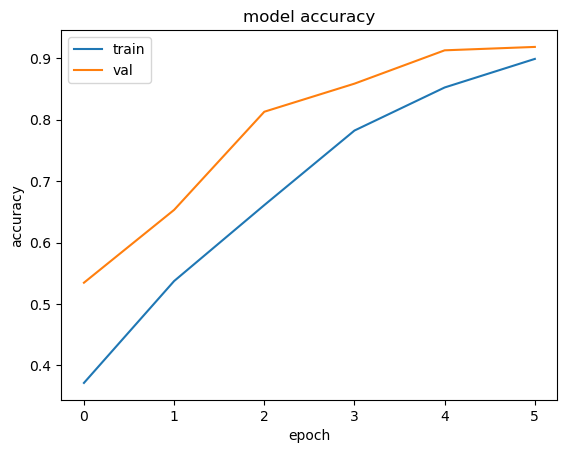

In [15]:
plt. plot(history.history['accuracy'] + history1.history['accuracy'])
plt. plot(history.history['val_accuracy'] + history1. history[ 'val_accuracy' ])
plt. title('model accuracy')
plt. ylabel('accuracy')
plt. xlabel ('epoch')
plt. legend(['train', 'val'], loc='upper left' )
plt. show()

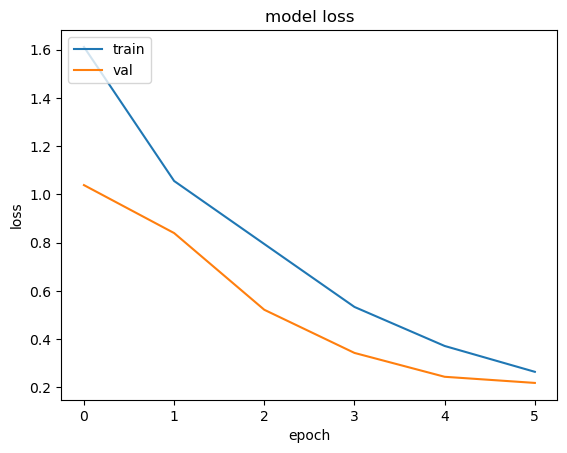

In [16]:
plt. plot(history.history[ 'loss'] + history1.history['loss'])
plt. plot(history.history['val_loss' ] + history1. history['val_loss'])
plt. title('model loss')
plt. ylabel('loss')
plt. xlabel('epoch')
plt. legend(['train', 'val'], loc='upper left' )
plt. show()


In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn. metrics import classification_report
y_test = test_images. labels # set y_test to the expected output
print(classification_report(y_test, pred2))
print("Accuracy of the Model: ", "{:.1f}%".format(accuracy_score(y_test, pred2)*100))


              precision    recall  f1-score   support

  eosinophil       0.89      0.88      0.89       765
  lymphocyte       0.92      0.99      0.95       739
    monocyte       0.98      1.00      0.99       745
  neutrophil       0.92      0.84      0.88       739

    accuracy                           0.93      2988
   macro avg       0.93      0.93      0.93      2988
weighted avg       0.93      0.93      0.93      2988

Accuracy of the Model:  92.8%


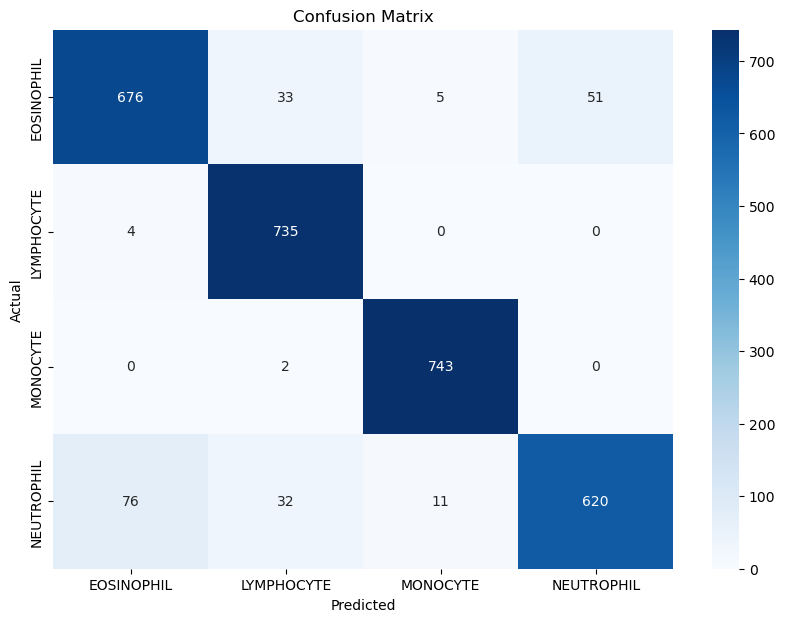

In [21]:
import matplotlib. pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
class_labels = ['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']
cm = confusion_matrix(y_test, pred2)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues' )
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=class_labels)
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt. title("Confusion Matrix")
plt. show()

In [33]:
model.save("Blood Cell.h5")

In [39]:
%store model


Stored 'model' (Sequential)


In [40]:
from keras.models import load_model
model = load_model("Blood Cell.h5")

%store model


Stored 'model' (Sequential)


In [1]:
%store -r model

In [13]:
from keras.models import load_model
model = load_model("Blood Cell.h5")

%store model


Stored 'model' (Sequential)
